In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
from statistics import median
from scipy import stats
%matplotlib inline

In [2]:
with open("diseaseSequences.json", 'r') as f:
    protein_sequence = json.load(f)

In [3]:
length = []
for x in protein_sequence:
    length.append(len(x))
test = sorted(length) #creates a sorted list

In [4]:
print(sorted(length)[-100:])

[2414, 2419, 2442, 2442, 2442, 2443, 2446, 2471, 2477, 2477, 2479, 2492, 2506, 2506, 2511, 2527, 2539, 2555, 2570, 2581, 2590, 2595, 2633, 2644, 2647, 2663, 2677, 2677, 2696, 2696, 2725, 2743, 2768, 2804, 2804, 2813, 2813, 2839, 2839, 2843, 2843, 2871, 2871, 2871, 2871, 2912, 2944, 2964, 2964, 2997, 2997, 3056, 3097, 3122, 3142, 3144, 3169, 3174, 3177, 3177, 3336, 3396, 3418, 3460, 3477, 3526, 3530, 3623, 3685, 3801, 3907, 3957, 3957, 3972, 4012, 4022, 4061, 4061, 4074, 4167, 4303, 4303, 4314, 4391, 4523, 4563, 4563, 4579, 4624, 4684, 4911, 4967, 5038, 5202, 5537, 5537, 6907, 8525, 35991, 35991]


In [5]:
stats.iqr(length)

459.25

In [6]:
np.percentile(length, 75)

775.25

In [7]:
np.percentile(length, 25)

316.0

In [8]:
#outliers lie q1 - iqr, q3 + iqr

In [9]:
stats.iqr(length)+np.percentile(length,75) #remove any data points greater than 1,116 amino acids

1234.5

In [16]:
cutoff = 0
for x in test:
    if x >= 1234.5:
        cutoff = test.index(x)
        break
print(cutoff)

2174


In [17]:
z = len(length)-cutoff
print(z)
final = test[0:cutoff] #removes the outliers
print(len(final))

326
2174


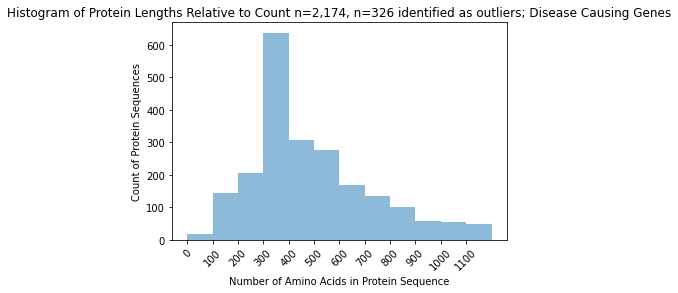

In [19]:
counts = plt.hist(final, bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200], alpha =0.5)
plt.xticks(np.arange(0, 1200, step=100), rotation = 45)
plt.xlabel("Number of Amino Acids in Protein Sequence")
plt.ylabel("Count of Protein Sequences")
plt.title("Histogram of Protein Lengths Relative to Count n=2,174, n=326 identified as outliers; Disease Causing Genes")
plt.show()

In [13]:
final2 = []
for x in counts[0]:
    z = x/len(final)
    final2.append(z)
print(final2)

[0.008506616257088847, 0.06805293005671077, 0.09735349716446125, 0.30103969754253307, 0.14508506616257089, 0.13090737240075614, 0.07939508506616257, 0.06427221172022685, 0.04773156899810964, 0.027410207939508508, 0.026465028355387523, 0.003780718336483932]


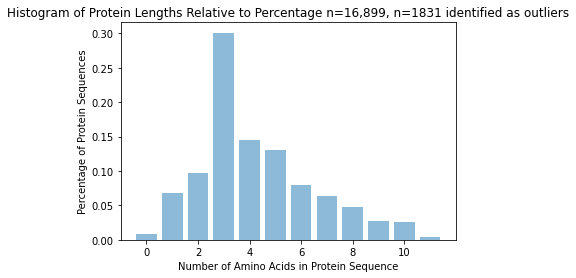

In [14]:
xpos = np.arange(len(final2))
plt.bar(xpos, final2, alpha = 0.5, align = 'center', capsize = 10)
plt.xlabel("Number of Amino Acids in Protein Sequence")
plt.ylabel("Percentage of Protein Sequences")
plt.title("Histogram of Protein Lengths Relative to Percentage n=16,899, n=1831 identified as outliers")
plt.show()

In [15]:
track10 = 0
track100 = 0
track200 = 0
track500 = 0
track1000 = 0
for x in final:
    if x < 10:
        track10 +=1
    if x < 100:
        track100 +=1
    if x < 200:
        track200 +=1
    if x < 500:
        track500 +=1
    if x < 1000:
        track1000 +=1
print(track10)
print(track100)
print(track200)
print(track500)
print(track1000)
print(track10/len(final))
print(track100/len(final))
print(track200/len(final))
print(track500/len(final))
print(track1000/len(final))

0
18
162
1312
2052
0.0
0.008506616257088847
0.07655954631379962
0.6200378071833649
0.9697542533081286
